Because a table neatly organizes values into rows and columns, we can easily look up specific values at the intersection of a row value and a column value. Unfortunately, it's very difficult to explore a dataset to uncover patterns when it's represented as a table, especially when that dataset contains many values. We need a different representation of data that can help us identify patterns more easily.

**Data visualization**, a discipline that focuses on the visual representation of data. As humans, our brains have evolved to develop powerful visual processing capabilities. We can quickly find patterns in the visual information we encounter, which was incredibly important from a survivability standpoint. Unfortunately, when data is represented as tables of values, we can't really take advantage of our visual pattern matching capabilities. This is because our ability to quickly process symbolic values (like numbers and words) is very poor. Data visualization focuses on transforming data from table representations visual ones.

The **United States Bureau of Labor Statistics (BLS)** surveys and calculates the monthly unemployment rate

The `BLS` releases monthly unemployment data available for download 

While the pandas library can read in `XLSX` files, it relies on an external library for actually parsing the format. Let's instead download the same dataset as a CSV file from the website of the [Federal Reserve Bank of St. Louis](https://www.stlouisfed.org/). We've downloaded the monthly unemployment rate as a CSV from January 1948 to August 2016, saved it as unrate.csv

In [2]:
import pandas as pd
unrate = pd.read_csv("unrate.csv")
print(unrate.info())
print(unrate.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    824 non-null    object 
 1   VALUE   824 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB
None
         DATE  VALUE
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5


When we read the dataset into a DataFrame, pandas will set the data type of the DATE column as a text column. We need to convert this column to the datetime


In [3]:
unrate["DATE"] = pd.to_datetime(unrate["DATE"])
print(unrate["DATE"].dtype)

datetime64[ns]


In [4]:
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


We can make the following observations from the table:

* In 1948:
   * monthly unemployment rate ranged between 3.4 and 4.0.
   * highest unemployment rate was reached in both March and December.
   * lowest unemployment rate was reached in January.
* From January to March, unemployment rate trended up.
* From March to May, unemployment rate trended down.
* From May to August, unemployment rate trended up.
* From August to October, unemployment rate trended down.
* From October to December, unemployment rate trended up.

Because the table only contained the data from 1948, it didn't take too much time to identify these observations. If we scale up the table to include all 824 rows, it would be very time-consuming and painful to understand.

One thing we learned from looking at the monthly unemployment rates for 1948 is that every few months, the unemployment rate switches between trending up and trending down. It's not switching direction every month, however, and this could mean that there's a seasonal effect. Seasonality is when a pattern is observed on a regular, predictable basis for a specific reason. A simple example of seasonality would be a large increase textbook purchases every August every year. Many schools start their terms in August and this spike in textbook sales is directly linked.

We need to first understand if there's any seasonality by comparing the unemployment trends across many years so we can decide if we should investigate it further. The faster we're able to assess our data, the faster we can perform high-level analysis quickly. If we're reliant on just the table to help us figure this out, then we won't be able to perform a high level test quickly. Let's see how a visual representation of the same information can be more helpful than the table representation.

**Plots** are a category of visual representations that allow us to easily understand the relationships between variables. There are many types of plots and selecting the right one is an important skill. Because we want to compare the unemployment trends across time, we should use **line charts**.

Line charts work best when there is a logical connection between adjacent points. In our case, that connection is the flow of time. Between 2 reported monthly unemployment values, the unemployment rate is fluctuating and time is passing.

When working with commonly used plots in `matplotlib`, the general workflow is:

* create a plot using data
* customize the appearance of the plot
* display the plot
* edit and repeat until satisfied

To create the line chart, we'll use the `matplotlib` library.The pyplot module provides a high-level interface for matplotlib that allows us to quickly create common data plots and perform common tweaks to them.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

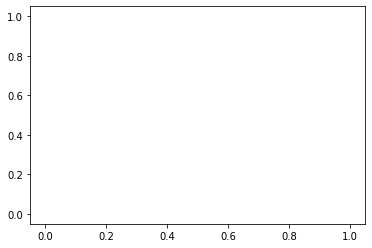

In [6]:
plt.plot()
plt.show()

`Matplotlib` will accept any iterable object, like `NumPy` arrays and `pandas.Series` instances.

Generate a **line chart** that visualizes the unemployment rates from 1948:

To generate the line chart we're interested in, we pass in the list of x-values as the first parameter and the list of y-values as the second parameter to `plot()`:

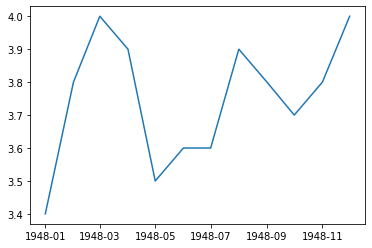

In [8]:
# Generate a line chart that visualizes the unemployment rates from 1948:
plt.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
plt.show()

While the y-axis looks fine, the x-axis tick labels are too close together and are unreadable. 

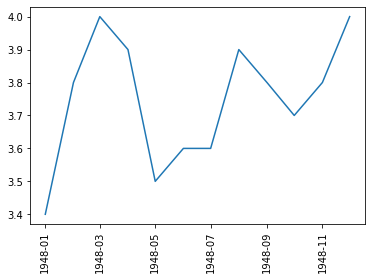

In [9]:
plt.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
plt.xticks(rotation = 90) # to rotate the x-axis tick labels by 90 degrees
plt.show()

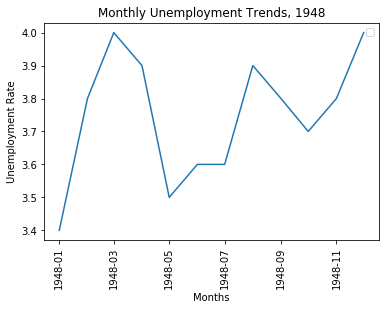

In [12]:
plt.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
plt.xticks(rotation = 90) # to rotate the x-axis tick labels by 90 degrees
plt.xlabel("Months")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.legend("")
plt.show()